Sample part number 3718541C93

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

seed = 123909783

In [2]:
df_nav830 = pd.read_csv("./ML_Project/ML_Project_tbl_nav830_hist_1yr.csv")
df_arch_1 = pd.read_csv("./ML_Project/ML_Project_ldos_archive_1yr (1).csv")
df_arch_2 = pd.read_csv("./ML_Project/ML_Project_ldos_archive_1yr (2).csv")
df_arch = pd.concat([df_arch_1, df_arch_2], ignore_index=True)

df_znmps = pd.read_csv("./ML_Project/ML_Project_tbl_znmps3400_1yr.csv")

In [3]:
df_nav830.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921134 entries, 0 to 921133
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   updated         921134 non-null  object 
 1   qualifier       921134 non-null  object 
 2   bano            921134 non-null  int64  
 3   item            921134 non-null  object 
 4   cono            921134 non-null  object 
 5   cont            921134 non-null  int64  
 6   supplier_alias  921134 non-null  object 
 7   csel            921134 non-null  object 
 8   schn            921134 non-null  int64  
 9   seqn            921134 non-null  int64  
 10  isdt            921134 non-null  object 
 11  cuqp            921134 non-null  object 
 12  lded            921134 non-null  object 
 13  lreq            921134 non-null  float64
 14  yreq            921134 non-null  float64
 15  cplb            921134 non-null  int64  
 16  ncmp            921134 non-null  int64  
 17  orga      

In [4]:
pd.set_option('display.max_columns', None)
df_nav830.head()[df_nav830.columns]

,updated,qualifier,bano,item,cono,cont,supplier_alias,csel,schn,seqn,isdt,cuqp,lded,lreq,yreq,cplb,ncmp,orga,edis,tme,wk01,wk02,wk03,wk04,wk05,wk06,wk07,wk08,wk09,wk10,wk11,wk12,flx,mth4,mth5,mth6
0,2023-03-26,HDR,20230326015582,4122569F91,AM537A,3120,ghejd,X5,571541,0,2023-03-26,PC,2023-03-24,7.0,240.0,26,65,X12,NAV830,615,17.0,11.0,12.0,19.0,22.0,19.0,22.0,16.0,18.0,17.0,20.0,14.0,44.0,197.0,112.0,114.0
1,2023-03-26,HDR,20230326004672,4030197C1,AB480A,2595,abiga,X1,570387,0,2023-03-26,PC,2023-03-07,50.0,98.0,26,65,X12,NAV830,551,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,50.0,0.0,0.0,50.0,50.0,0.0,50.0
2,2023-03-26,HDR,20230326004929,425FTA1125,034ECA,2760,aefjc,X1,559955,0,2023-03-26,PC,2022-10-28,1.0,0.0,55,65,X12,NAV830,552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2023-03-26,HDR,20230326008435,450RTH1685,053EAA,2335,bdhfe,X2,574317,0,2023-03-26,PC,2023-03-23,4.0,199.0,55,65,X12,NAV830,559,2.0,23.0,12.0,22.0,4.0,14.0,25.0,4.0,0.0,18.0,19.0,5.0,40.0,131.0,107.0,98.0
4,2023-03-26,HDR,20230326010466,4368389C1,AI589A,3205,djiba,X4,560643,0,2023-03-26,PC,2022-12-06,1.0,0.0,60,65,X12,NAV830,604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df_nav830['item'].nunique()

25950

In [6]:
df_nav830[['updated','item']].nunique()

updated       52
item       25950
dtype: int64

In [7]:
df_nav830[(df_nav830['item']=='4122569F91')].sort_values(by='updated').head(52)

,updated,qualifier,bano,item,cono,cont,supplier_alias,csel,schn,seqn,isdt,cuqp,lded,lreq,yreq,cplb,ncmp,orga,edis,tme,wk01,wk02,wk03,wk04,wk05,wk06,wk07,wk08,wk09,wk10,wk11,wk12,flx,mth4,mth5,mth6
402975,2022-07-17,HDR,20220717014903,4122569F91,AM537A,3120,ghejd,X5,468459,0,2022-07-17,PC,2022-07-15,1.0,552.0,93,65,X12,NAV830,244,11.0,22.0,35.0,27.0,6.0,24.0,18.0,28.0,19.0,10.0,18.0,17.0,107.0,115.0,60.0,14.0
837588,2022-07-24,HDR,20220724014942,4122569F91,AM537A,3120,ghejd,X5,486486,0,2022-07-24,PC,2022-07-22,2.0,555.0,93,65,X12,NAV830,550,23.0,42.0,24.0,8.0,28.0,15.0,27.0,16.0,16.0,15.0,17.0,37.0,67.0,108.0,61.0,62.0
903168,2022-07-31,HDR,20220731014937,4122569F91,AM537A,3120,ghejd,X5,405269,0,2022-07-31,PC,2022-07-29,1.0,563.0,93,65,X12,NAV830,333,42.0,18.0,11.0,24.0,16.0,30.0,16.0,18.0,25.0,15.0,36.0,18.0,48.0,107.0,56.0,122.0
584941,2022-08-07,HDR,20220807015083,4122569F91,AM537A,3120,ghejd,X5,423415,0,2022-08-07,PC,2022-08-05,1.0,594.0,93,65,X12,NAV830,213,29.0,14.0,23.0,23.0,16.0,20.0,19.0,16.0,16.0,35.0,19.0,28.0,20.0,97.0,47.0,191.0
519967,2022-08-14,HDR,20220814014949,4122569F91,AM537A,3120,ghejd,X5,442551,0,2022-08-14,PC,2022-08-12,1.0,620.0,93,65,X12,NAV830,227,26.0,21.0,19.0,25.0,22.0,23.0,33.0,36.0,38.0,21.0,29.0,20.0,105.0,51.0,201.0,0.0
349465,2022-08-21,HDR,20220821014994,4122569F91,AM537A,3120,ghejd,X5,460622,0,2022-08-21,PC,2022-08-19,1.0,645.0,93,65,X12,NAV830,227,18.0,17.0,16.0,21.0,30.0,33.0,34.0,38.0,19.0,29.0,20.0,37.0,58.0,47.0,207.0,45.0
807995,2022-08-28,HDR,20220828015065,4122569F91,AM537A,3120,ghejd,X5,478790,0,2022-08-28,PC,2022-08-25,2.0,649.0,93,65,X12,NAV830,229,25.0,22.0,19.0,47.0,20.0,34.0,39.0,17.0,29.0,20.0,35.0,17.0,38.0,55.0,204.0,74.0
908075,2022-09-04,HDR,20220904015168,4122569F91,AM537A,3120,ghejd,X5,513829,0,2022-09-04,PC,2022-09-02,3.0,670.0,93,65,X12,NAV830,246,25.0,18.0,31.0,31.0,32.0,36.0,16.0,30.0,22.0,42.0,18.0,24.0,13.0,59.0,209.0,92.0
886484,2022-09-11,HDR,20220911015018,4122569F91,AM537A,3120,ghejd,X5,537093,0,2022-09-11,PC,2022-09-09,3.0,688.0,93,65,X12,NAV830,217,26.0,31.0,32.0,13.0,43.0,20.0,26.0,9.0,38.0,30.0,24.0,13.0,55.0,201.0,126.0,0.0
607806,2022-09-18,HDR,20220918014500,4122569F91,AM537A,3120,ghejd,X5,554455,0,2022-09-18,PC,2022-09-15,4.0,700.0,93,65,X12,NAV830,211,32.0,39.0,15.0,43.0,31.0,32.0,5.0,9.0,22.0,31.0,21.0,20.0,34.0,204.0,139.0,51.0


In [8]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044874 entries, 0 to 1044873
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   row_num                1044874 non-null  int64  
 1   updated_ts             1044874 non-null  object 
 2   volume                 1044874 non-null  object 
 3   company                1044874 non-null  int64  
 4   rpl                    1044874 non-null  object 
 5   edi                    1044874 non-null  int64  
 6   davg                   1044874 non-null  float64
 7   dvol                   1044874 non-null  float64
 8   item                   1044874 non-null  object 
 9   description            1044874 non-null  object 
 10  item_type              1044874 non-null  float64
 11  item_group             1044874 non-null  object 
 12  product_type           1044874 non-null  object 
 13  signal_code            50264 non-null    object 
 14  abc_class         

In [9]:
df_arch.head()[df_arch.columns]

,row_num,updated_ts,volume,company,rpl,edi,davg,dvol,item,description,item_type,item_group,product_type,signal_code,abc_class,last_transaction_date,min_order_qty,order_qty_multiple,safety_stock,stock_at_mrp,supplier_alias,trim(x_code),allocations,stock_oh,timpr010_dmnd,safety_time,days_of_lineset
0,1,2022-07-18 08:04:26.226793000,Low,65,Other,866,0.000000,0.000000,1001,Verificar Taladrado,1.0,011H,011,NaN,C,2022-07-15 00:00:00.0,1.0,1.0,0.0,2.0,jjjaa,X1,0.0,2.0,2505.00,0.0,26.0
1,2,2022-07-18 08:04:26.226793000,Low,65,Other,866,0.000000,0.000000,1002,Verificar Taladrado,1.0,011H,011,NaN,C,2022-07-15 00:00:00.0,1.0,1.0,0.0,5.0,jjjaa,X1,0.0,5.0,6241.00,0.0,26.0
2,3,2022-07-18 08:04:26.226793000,Low,65,Other,866,0.000000,0.000000,1003,Verificar Taladrado,1.0,011H,011,NaN,C,2022-05-18 00:00:00.0,1.0,1.0,0.0,0.0,jjjaa,X1,0.0,0.0,10.00,0.0,26.0
3,4,2022-07-18 08:04:26.226793000,Med,65,LSR,830,9.807692,0.377219,101984R1,EXTENSION,1.0,801F,001,NaN,C,2022-07-15 00:00:00.0,1.0,60.0,0.0,197.0,abiga,X1,255.0,197.0,1353.05,4.0,26.0
4,5,2022-07-18 08:04:26.226793000,Low,65,Other,866,0.000000,0.000000,1024,"STANDARD PART / NOT ASSIGNED,",1.0,011H,011,NaN,C,2022-01-18 00:00:00.0,1.0,1.0,0.0,0.0,jjjaa,X1,0.0,0.0,2.14,0.0,26.0


In [10]:
df_arch[(df_arch['item']=='4122569F91')].sort_values(by='updated_ts').head(52)

,row_num,updated_ts,volume,company,rpl,edi,davg,dvol,item,description,item_type,item_group,product_type,signal_code,abc_class,last_transaction_date,min_order_qty,order_qty_multiple,safety_stock,stock_at_mrp,supplier_alias,trim(x_code),allocations,stock_oh,timpr010_dmnd,safety_time,days_of_lineset
9480,9481,2022-07-18 08:04:26.226793000,Med,65,Other,866,3.653846,0.140533,4122569F91,"MM,SLEEPER CONTROL,CUT-OUT DI",1.0,313L,021,NaN,C,2022-07-15 00:00:00.0,1.0,1.0,0.0,2.0,ghejd,X5,95.0,2.0,532.98,3.0,26.0
28970,28971,2022-07-25 04:03:00.264833000,Med,65,Other,866,3.730769,0.143491,4122569F91,"MM,SLEEPER CONTROL,CUT-OUT DI",1.0,313L,021,NaN,C,2022-07-23 00:00:00.0,1.0,1.0,0.0,2.0,ghejd,X5,97.0,2.0,567.38,3.0,26.0
48465,48466,2022-08-01 02:40:16.110227000,Med,65,Other,866,4.280000,0.171200,4122569F91,"MM,SLEEPER CONTROL,CUT-OUT DI",1.0,313L,021,NaN,C,2022-07-29 00:00:00.0,1.0,1.0,0.0,1.0,ghejd,X5,107.0,1.0,615.08,3.0,25.0
67904,67905,2022-08-08 02:02:14.618205000,Med,65,Other,866,3.916667,0.163194,4122569F91,"MM,SLEEPER CONTROL,CUT-OUT DI",1.0,313L,021,NaN,C,2022-08-06 00:00:00.0,1.0,1.0,0.0,1.0,ghejd,X5,94.0,1.0,623.79,3.0,24.0
87289,87290,2022-08-15 02:24:40.096979000,Med,65,Other,866,3.320000,0.132800,4122569F91,"MM,SLEEPER CONTROL,CUT-OUT DI",1.0,313L,021,NaN,C,2022-08-12 00:00:00.0,1.0,1.0,0.0,1.0,ghejd,X5,83.0,1.0,677.72,3.0,25.0
106691,106692,2022-08-22 03:23:31.641529000,Med,65,Other,866,3.346154,0.128698,4122569F91,"MM,SLEEPER CONTROL,CUT-OUT DI",1.0,313L,021,NaN,C,2022-08-20 00:00:00.0,1.0,1.0,0.0,4.0,ghejd,X5,87.0,4.0,672.16,3.0,26.0
126073,126074,2022-08-29 08:54:10.024514000,Med,65,Other,866,3.416667,0.142361,4122569F91,"MM,SLEEPER CONTROL,CUT-OUT DI",1.0,313L,021,NaN,C,2022-08-25 00:00:00.0,1.0,1.0,0.0,3.0,ghejd,X5,82.0,3.0,697.35,3.0,24.0
145338,145339,2022-09-05 02:02:37.054521000,Med,65,Other,866,4.583333,0.190972,4122569F91,"MM,SLEEPER CONTROL,CUT-OUT DI",1.0,313L,021,NaN,C,2022-09-02 00:00:00.0,1.0,1.0,0.0,4.0,ghejd,X5,110.0,4.0,702.51,3.0,24.0
164126,164127,2022-09-12 02:01:59.009401000,Med,65,Other,866,4.080000,0.163200,4122569F91,"MM,SLEEPER CONTROL,CUT-OUT DI",1.0,313L,021,NaN,C,2022-09-10 00:00:00.0,1.0,1.0,0.0,2.0,ghejd,X5,102.0,2.0,732.00,3.0,25.0
182885,182886,2022-09-19 02:03:01.814071000,Med,65,Other,866,5.166667,0.215278,4122569F91,"MM,SLEEPER CONTROL,CUT-OUT DI",1.0,313L,021,NaN,C,2022-09-15 00:00:00.0,1.0,1.0,0.0,5.0,ghejd,X5,124.0,5.0,738.21,3.0,24.0


In [11]:
df_znmps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114881 entries, 0 to 114880
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gdte         114881 non-null  object 
 1   pdte         114881 non-null  object 
 2   ncmp         114881 non-null  int64  
 3   mfg_ln       114881 non-null  int64  
 4   model        114881 non-null  object 
 5   prte         114881 non-null  int64  
 6   lqty         114881 non-null  int64  
 7   sqty         114881 non-null  int64  
 8   oqty         114881 non-null  int64  
 9   fqty         114881 non-null  int64  
 10  mqty         114881 non-null  int64  
 11  pcnt         114881 non-null  float64
 12  mfam         114881 non-null  object 
 13  updated_dts  114881 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.3+ MB


In [12]:
df_znmps.head()[df_znmps.columns]

,gdte,pdte,ncmp,mfg_ln,model,prte,lqty,sqty,oqty,fqty,mqty,pcnt,mfam,updated_dts
0,2023-03-13 00:00:00.000,2023-03-10 00:00:00.000,65,1,XH01500,99,0,0,0,99,99,100.0,FCT1,2023-03-13 05:30:47.819603000
1,2023-03-13 00:00:00.000,2023-03-11 00:00:00.000,65,1,XH01500,99,0,0,0,99,99,100.0,FCT1,2023-03-13 05:30:47.819603000
2,2023-03-13 00:00:00.000,2023-03-13 00:00:00.000,65,1,XH01500,99,0,0,0,99,99,100.0,FCT1,2023-03-13 05:30:47.819603000
3,2023-03-13 00:00:00.000,2023-03-14 00:00:00.000,65,1,XH01500,99,0,0,0,99,99,100.0,FCT1,2023-03-13 05:30:47.819603000
4,2023-03-13 00:00:00.000,2023-03-15 00:00:00.000,65,1,XH01500,99,0,0,0,99,99,100.0,FCT1,2023-03-13 05:30:47.819603000


In [13]:
print(df_znmps['model'].nunique())
df_znmps['model'].unique()

23


array(['XH01500', 'HX52000', 'HX62000', 'LT62A00', 'LT62F00', 'RH61A00',
       'RH61F00', 'HV51300', 'HV60G00', 'HV61300', 'LS53200', '530C100',
       'LT62T00', '041C100', 'RH61T00', '034C100', 'HV60700', 'HV50700',
       '040C100', '026C100', '526C100', 'SF64700', '535C100'],
      dtype=object)

In [14]:
df_arch['updated_ts'] = pd.to_datetime(df_arch['updated_ts'])
df_arch['updated'] = df_arch['updated_ts'].dt.normalize() # Get rid of time component

df_nav830['updated'] = pd.to_datetime(df_nav830['updated'])
df_nav830['company'] = df_nav830['ncmp']

# This Merge seems suspect.  This could be impacting our clustering...

In [15]:
# Need 
merged_df = pd.merge(df_arch, df_nav830, on=['item', 'company', 'supplier_alias','updated'])
merged_df.head(5)

,row_num,updated_ts,volume,company,rpl,edi,davg,dvol,item,description,item_type,item_group,product_type,signal_code,abc_class,last_transaction_date,min_order_qty,order_qty_multiple,safety_stock,stock_at_mrp,supplier_alias,trim(x_code),allocations,stock_oh,timpr010_dmnd,safety_time,days_of_lineset,updated,qualifier,bano,cono,cont,csel,schn,seqn,isdt,cuqp,lded,lreq,yreq,cplb,ncmp,orga,edis,tme,wk01,wk02,wk03,wk04,wk05,wk06,wk07,wk08,wk09,wk10,wk11,wk12,flx,mth4,mth5,mth6
0,251431,2022-10-17 02:02:29.235389,Low,65,Other,866,0.0,0.000000,1001,Verificar Taladrado,1.0,011H,011,NaN,C,2022-10-14 00:00:00.0,1.0,1.0,0.0,4.0,jjjaa,X1,0.0,4.0,1895.00,0.0,24.0,2022-10-17,HDR,20221016000144,069MBA,3470,X1,623503,0,2022-10-16,PC,2022-10-14,2.0,2880.0,91,65,X12,NAV830,227,0.0,0.0,0.0,0.0,79.0,108.0,109.0,129.0,172.0,281.0,0.0,134.0,387.0,227.0,162.0,103.0
1,251432,2022-10-17 02:02:29.235389,Low,65,Other,866,0.0,0.000000,1002,Verificar Taladrado,1.0,011H,011,NaN,C,2022-10-14 00:00:00.0,1.0,1.0,0.0,7.0,jjjaa,X1,0.0,7.0,6416.00,0.0,24.0,2022-10-17,HDR,20221016000145,069MBA,3470,X1,623504,0,2022-10-16,PC,2022-10-14,3.0,8029.0,91,65,X12,NAV830,227,0.0,0.0,0.0,0.0,203.0,312.0,315.0,320.0,332.0,853.0,0.0,333.0,1336.0,1134.0,904.0,367.0
2,251434,2022-10-17 02:02:29.235389,Low,65,Other,866,0.0,0.000000,1003,Verificar Taladrado,1.0,011H,011,NaN,C,2022-08-16 00:00:00.0,1.0,1.0,0.0,0.0,jjjaa,X1,0.0,0.0,30.00,0.0,24.0,2022-10-17,HDR,20221016000116,069MBA,3470,X1,623021,0,2022-10-16,PC,2022-08-16,1.0,91.0,91,65,X12,NAV830,227,0.0,0.0,0.0,0.0,0.0,3.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
3,251436,2022-10-17 02:02:29.235389,Med,65,LSR,830,11.0,0.458333,101984R1,EXTENSION,1.0,801F,001,NaN,C,2022-10-15 00:00:00.0,1.0,60.0,0.0,171.0,abiga,X1,264.0,171.0,1252.83,4.0,24.0,2022-10-17,HDR,20221016004347,AB480A,1409,X1,635485,0,2022-10-16,PC,2022-10-07,120.0,1980.0,26,65,X12,NAV830,233,0.0,0.0,0.0,18.0,60.0,60.0,60.0,0.0,60.0,0.0,0.0,120.0,240.0,180.0,180.0,60.0
4,251437,2022-10-17 02:02:29.235389,Low,65,Other,866,0.0,0.000000,1024,"STANDARD PART / NOT ASSIGNED,",1.0,011H,011,NaN,C,2022-01-18 00:00:00.0,1.0,1.0,0.0,0.0,jjjaa,X1,0.0,0.0,4.90,0.0,24.0,2022-10-17,HDR,20221016000143,AI419A,1374,X1,623502,0,2022-10-16,PC,2022-01-18,1.0,4.0,91,65,X12,NAV830,227,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68633 entries, 0 to 68632
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   row_num                68633 non-null  int64         
 1   updated_ts             68633 non-null  datetime64[ns]
 2   volume                 68633 non-null  object        
 3   company                68633 non-null  int64         
 4   rpl                    68633 non-null  object        
 5   edi                    68633 non-null  int64         
 6   davg                   68633 non-null  float64       
 7   dvol                   68633 non-null  float64       
 8   item                   68633 non-null  object        
 9   description            68633 non-null  object        
 10  item_type              68633 non-null  float64       
 11  item_group             68633 non-null  object        
 12  product_type           68633 non-null  object        
 13  s

In [17]:
# Check if any values in the 'yreq' column are zero
zero_yreq = (merged_df['timpr010_dmnd'] == 0).any()

print(f"Are there any zero values in the 'timpr010_dmnd' column? {zero_yreq}")

Are there any zero values in the 'timpr010_dmnd' column? False


In [37]:
# Week Columns from Code
week_cols = [f'wk{str(i).zfill(2)}' for i in range(1, 13)]

# We may want to smartly scale
# Look to normalize data by timpr010_dmnd # schedule_data = merged_df[week_cols].div(merged_df['timpr010_dmnd'], axis=0)[week_cols]

schedule_data = merged_df[week_cols]

In [38]:
schedule_data.head()

,wk01,wk02,wk03,wk04,wk05,wk06,wk07,wk08,wk09,wk10,wk11,wk12
0,0.0,0.0,0.0,0.0,79.0,108.0,109.0,129.0,172.0,281.0,0.0,134.0
1,0.0,0.0,0.0,0.0,203.0,312.0,315.0,320.0,332.0,853.0,0.0,333.0
2,0.0,0.0,0.0,0.0,0.0,3.0,1.0,5.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,18.0,60.0,60.0,60.0,0.0,60.0,0.0,0.0,120.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [39]:
# Review data with StandardScalar()
scaler = StandardScaler()
schedule_scaled = pd.DataFrame(scaler.fit_transform(schedule_data), columns=week_cols)

In [40]:
def find_optimal_clusters(data, max_k, random_state):
    wcss = []
    k_values = range(1, max_k+1)

    for k in k_values:
        kmeans = KMeans(n_init='auto', n_clusters=k, random_state=random_state)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, wcss, marker='o')
    plt.title('WCSS vs. Number of Clusters (k)')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Within-cluster sum of squares (WCSS)')
    plt.grid(True)
    plt.show()

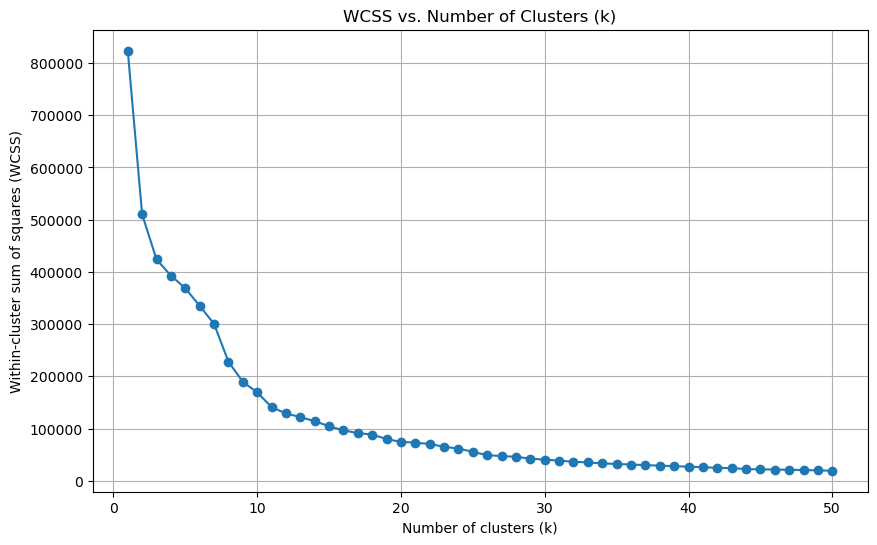

Wall time: 6.3 s


In [41]:
%%time
find_optimal_clusters(schedule_scaled, max_k=50, random_state=seed)

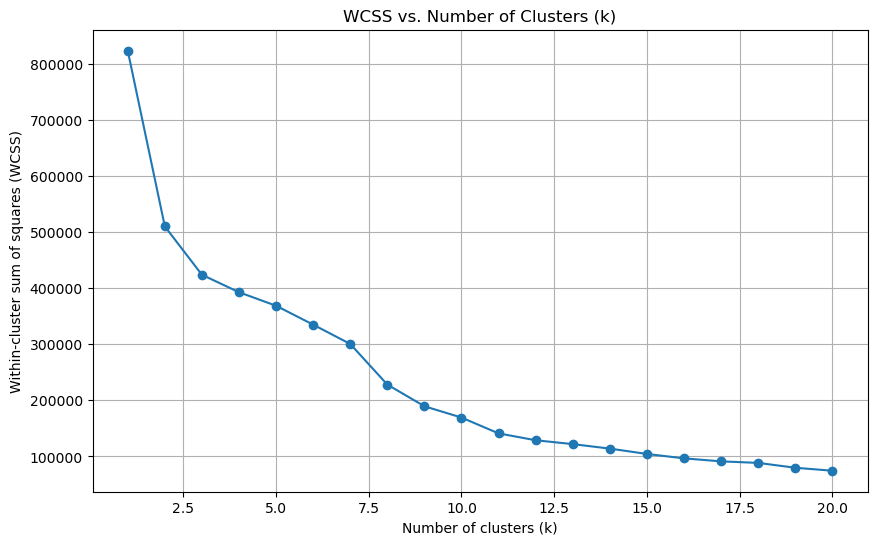

Wall time: 1.65 s


In [42]:
%%time
find_optimal_clusters(schedule_scaled, max_k=20, random_state=seed)

In [43]:
def find_optimal_clusters_with_silhouette(data, max_k, random_state):
    silhouette_scores = []
    k_values = range(2, max_k+1)  # silhouette score is not defined for k=1

    for k in k_values:
        kmeans = KMeans(n_init='auto', n_clusters=k, random_state=random_state)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. Number of Clusters (k)')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

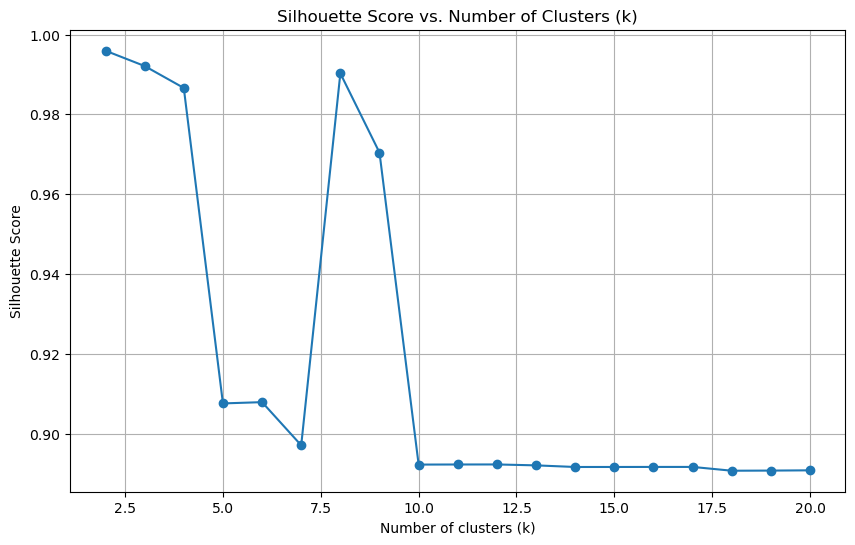

Wall time: 11min 5s


In [45]:
%%time
find_optimal_clusters_with_silhouette(schedule_scaled, max_k=20, random_state=seed)

In [52]:
def cluster_and_plot(data, n_clusters, random_state):
    # Create a KMeans instance with n_clusters
    kmeans = KMeans(n_init='auto', n_clusters=n_clusters, random_state=random_state)

    # Fit the model to the data and predict the cluster labels
    cluster_labels = kmeans.fit_predict(data)

    # Create a DataFrame with the scaled data and cluster labels
    clustered_data = data.copy()
    clustered_data['cluster'] = cluster_labels

    # Calculate the count of schedules in each cluster before melting
    cluster_counts = clustered_data['cluster'].value_counts().sort_index()
        
    # Melt the DataFrame to long format for plotting
    clustered_data_melt = pd.melt(clustered_data, id_vars=['cluster'], value_vars=data.columns, var_name='week', value_name='data')

    # Convert the 'week' column to integer for proper sorting
    clustered_data_melt['week'] = clustered_data_melt['week'].str.slice(2).astype(int)

    # Create a grid of subplots with one row for each cluster
    g = sns.FacetGrid(clustered_data_melt, col='cluster', col_wrap=2, height=4, aspect=1.5)
    
    # Plot the actual schedules for each cluster
    for ax in g.axes.flatten():
        cluster = ax.get_title().split('=')[1].strip()
        sns.lineplot(x='week', y='data', data=clustered_data_melt[clustered_data_melt['cluster'] == int(cluster)], alpha=0.7, errorbar=None, ax=ax)
        
        # Overlay the average schedule curve for each cluster
        sns.lineplot(x='week', y='data', data=clustered_data_melt[clustered_data_melt['cluster'] == int(cluster)], estimator='mean', lw=2, color='black', ax=ax)

        # Set the title to include the cluster number and count
        ax.set_title(f'Cluster {cluster} (n={cluster_counts[int(cluster)]})')
        
    g.fig.suptitle(f'12-week Schedule Patterns for {n_clusters} Clusters', y=1.02)
    plt.show()
    
    return clustered_data

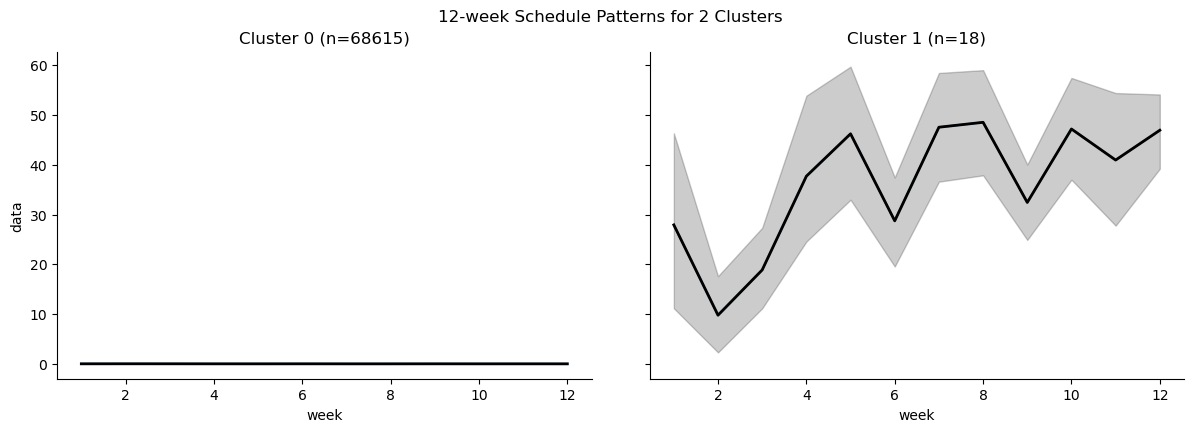

['2645294R1', '4120810R1', '2643446R2', '2643448R2', '4063107C1', '4346886C1', '3689727C1', '4421837C1']
Wall time: 4.52 s


In [56]:
%%time
clustered_scaled_schedule = cluster_and_plot(schedule_scaled, n_clusters=2, random_state=seed)

# Index should still allow us to match after the clustering
merged_scaled_schedule = pd.merge(merged_df, clustered_scaled_schedule[['cluster']], left_index=True, right_index=True)

distinct_items_in_clusters = {}
for cluster in merged_scaled_schedule['cluster'].unique():
    distinct_items_in_clusters[cluster] = merged_scaled_schedule[merged_scaled_schedule['cluster'] == cluster]['item'].unique().tolist()

# Cluster 1 only has 18 rows
print(distinct_items_in_clusters[1])

In [63]:
%%time
# Let's flag these values as outliers, remove these items using a boolean mask, then reanalyse the clustering
removal_mask = ~merged_df['item'].isin(distinct_items_in_clusters[1])
schedule_data_trimmed = merged_df[removal_mask][week_cols]

scaler = StandardScaler()
schedule_trimmed_scaled = pd.DataFrame(scaler.fit_transform(schedule_data_trimmed), columns=week_cols)

Wall time: 30 ms


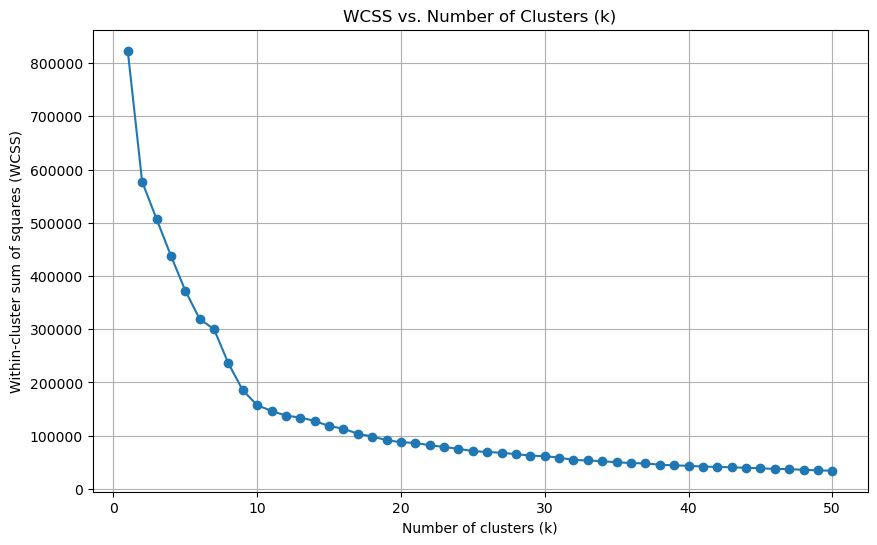

Wall time: 6.2 s


In [64]:
%%time
find_optimal_clusters(schedule_trimmed_scaled, max_k=50, random_state=seed)

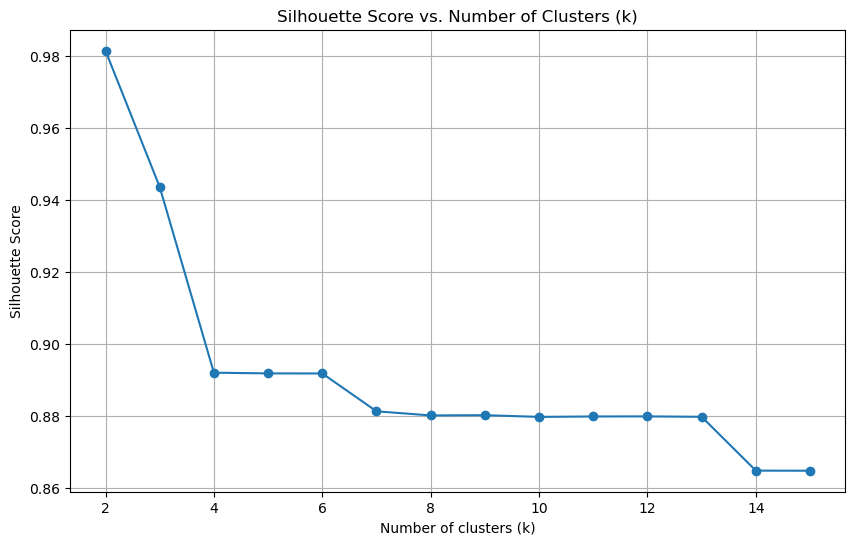

Wall time: 8min 7s


In [65]:
%%time
find_optimal_clusters_with_silhouette(schedule_trimmed_scaled, max_k=15, random_state=seed)

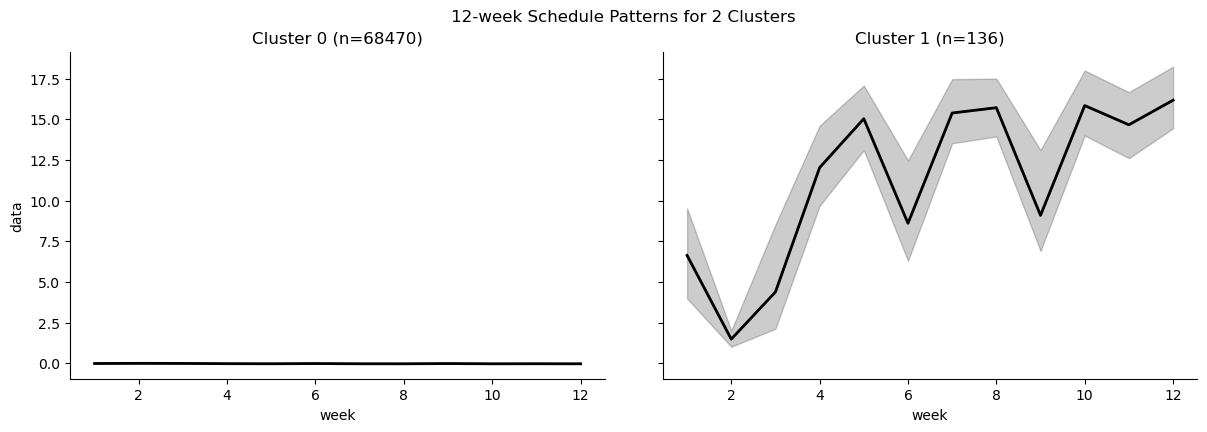

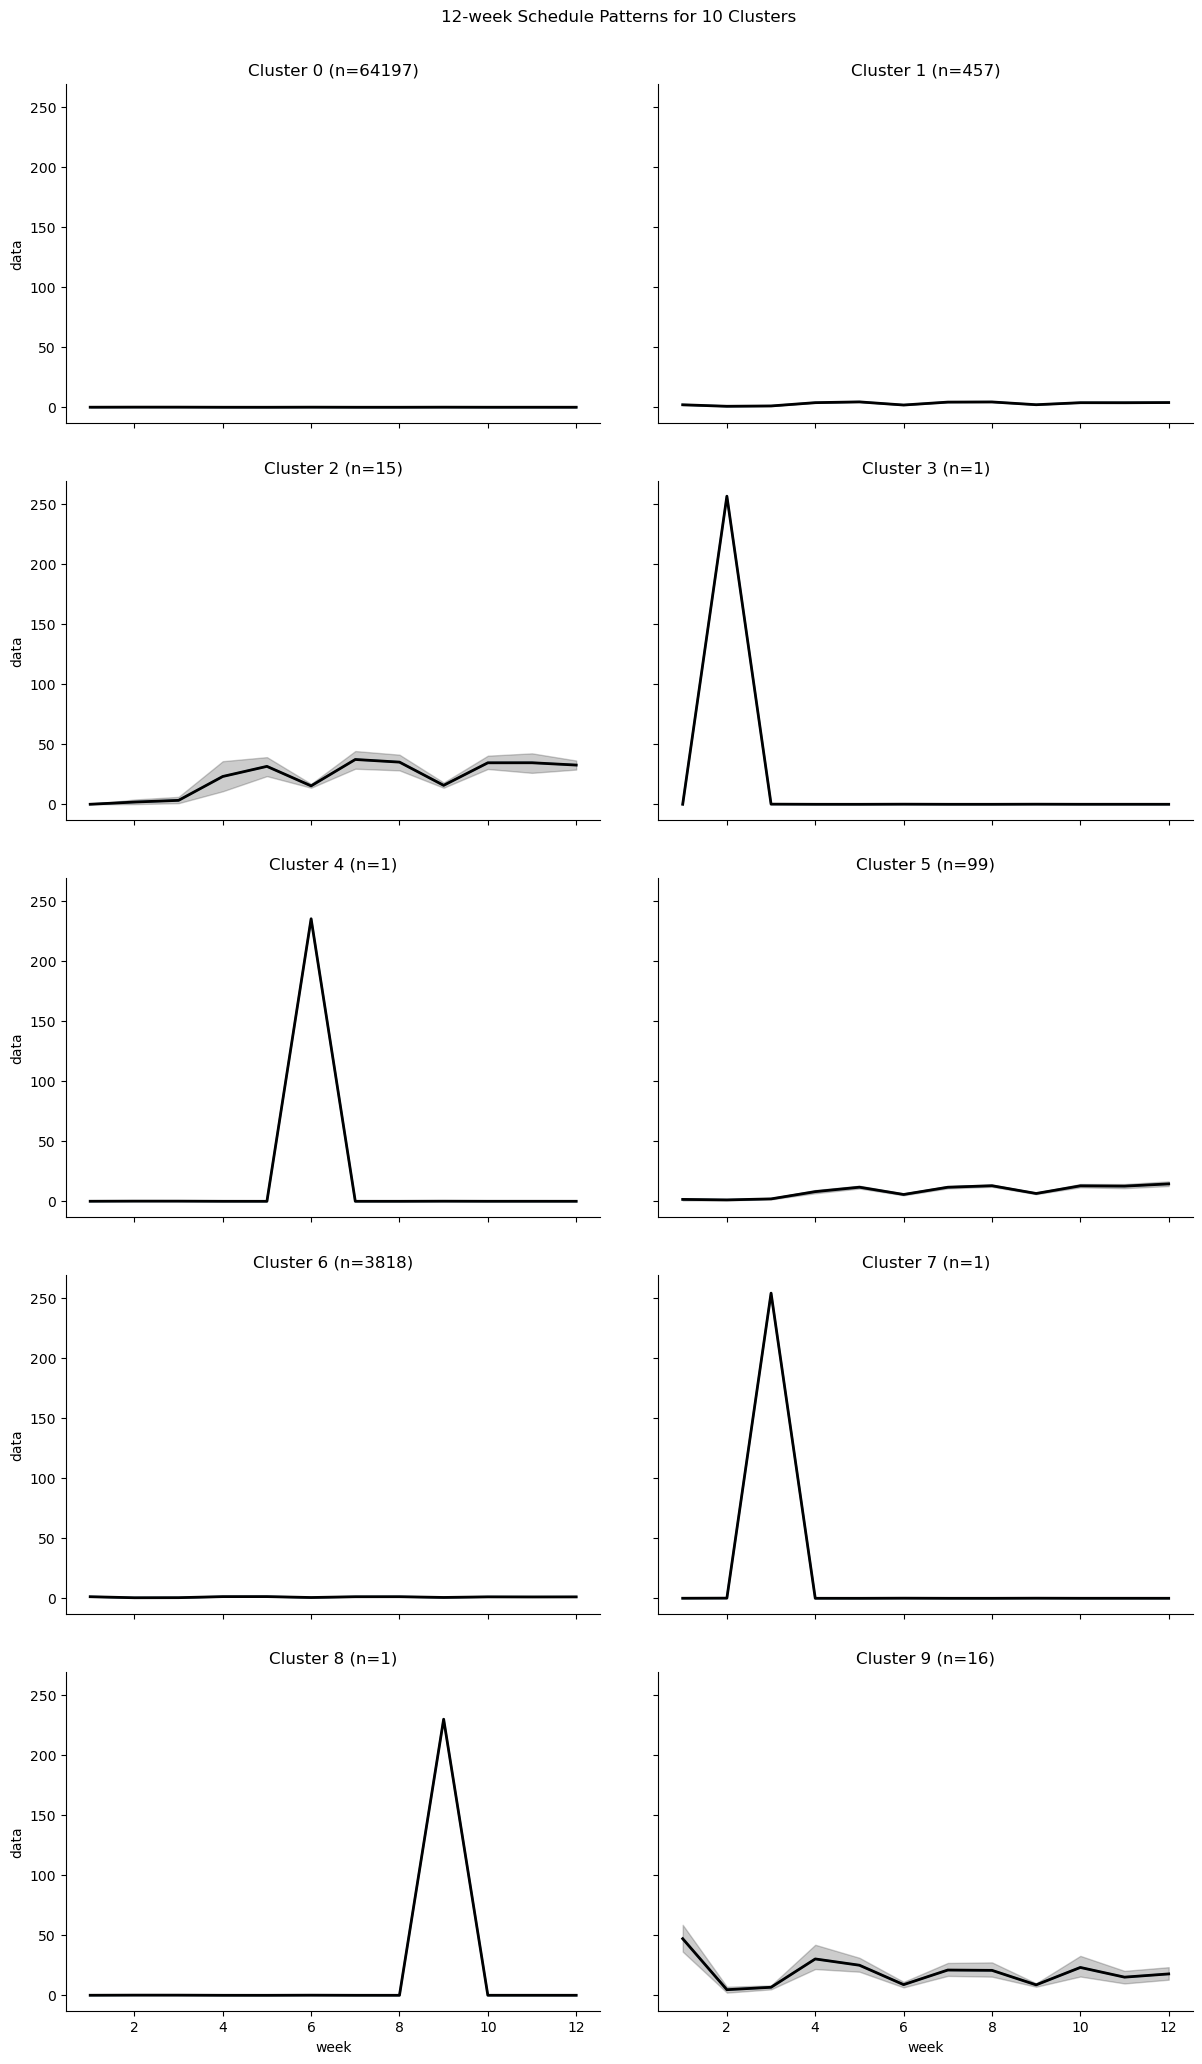

Wall time: 9.98 s


''

In [66]:
%%time
# k=2,10 look promising from the Elbow, 2 from Silhouette

cluster_and_plot(schedule_trimmed_scaled, n_clusters=2, random_state=seed)
cluster_and_plot(schedule_trimmed_scaled, n_clusters=10, random_state=seed)
;

In [68]:
# Scaling seems to be a huge issue here.  Let's try RobustScaler() but I suspect we need to engineer a percentage change between 
# periods instead of using the information like this
scaler = RobustScaler()
schedule_trimmed_rscaled = pd.DataFrame(scaler.fit_transform(schedule_data_trimmed), columns=week_cols)

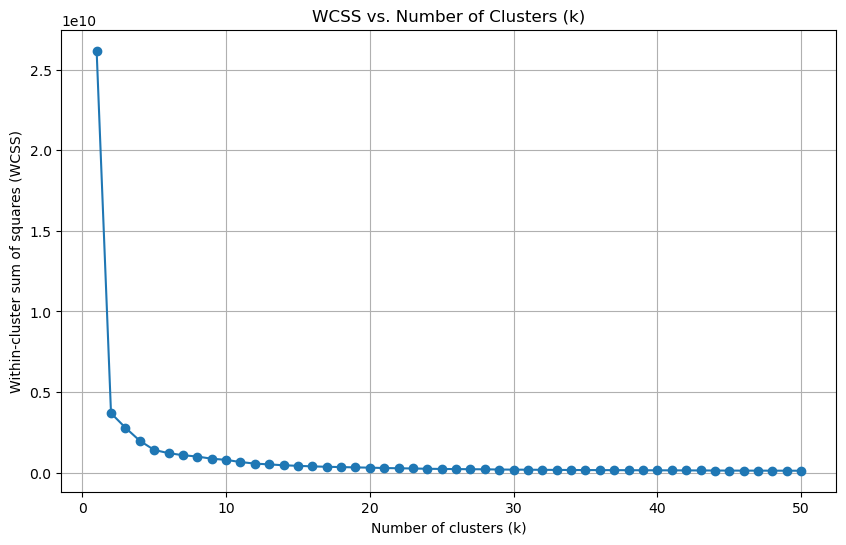

Wall time: 6.44 s


In [69]:
%%time
find_optimal_clusters(schedule_trimmed_rscaled, max_k=50, random_state=seed)

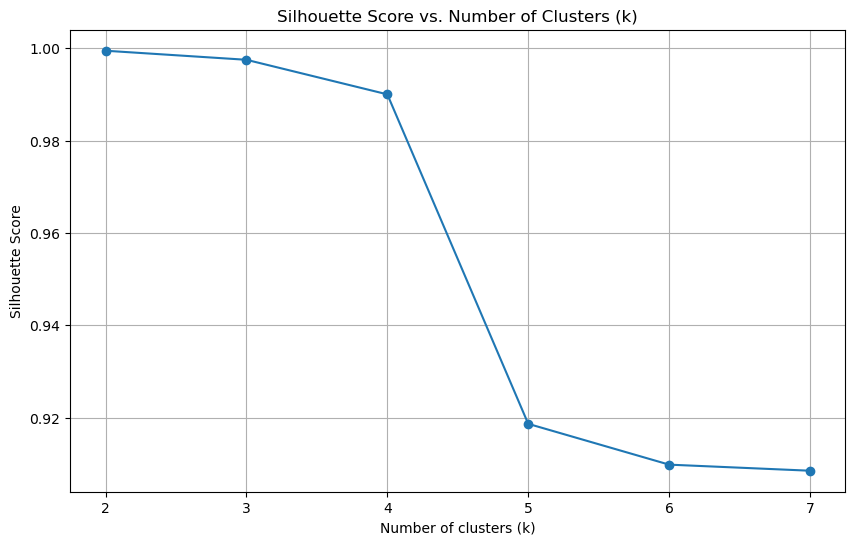

Wall time: 3min 26s


In [71]:
%%time
find_optimal_clusters_with_silhouette(schedule_trimmed_rscaled, max_k=7, random_state=seed)

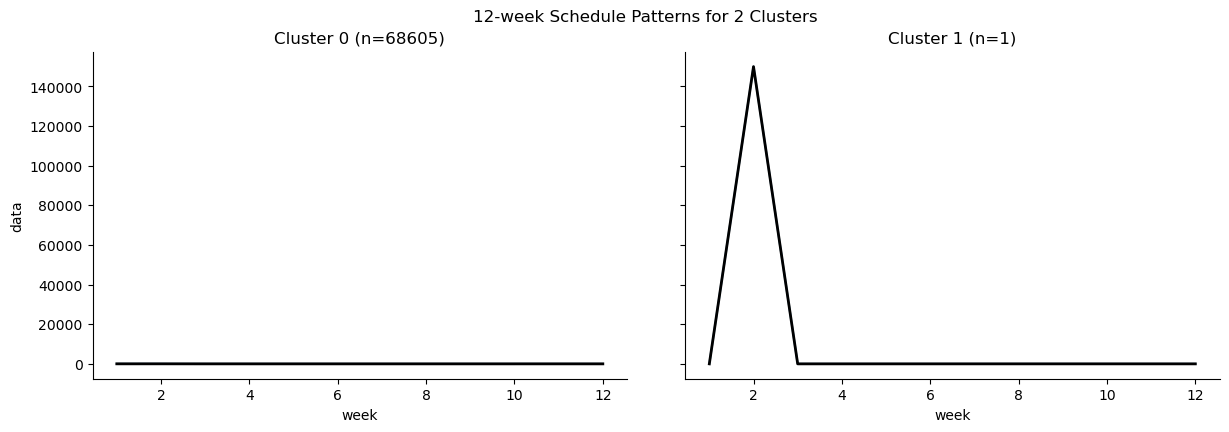

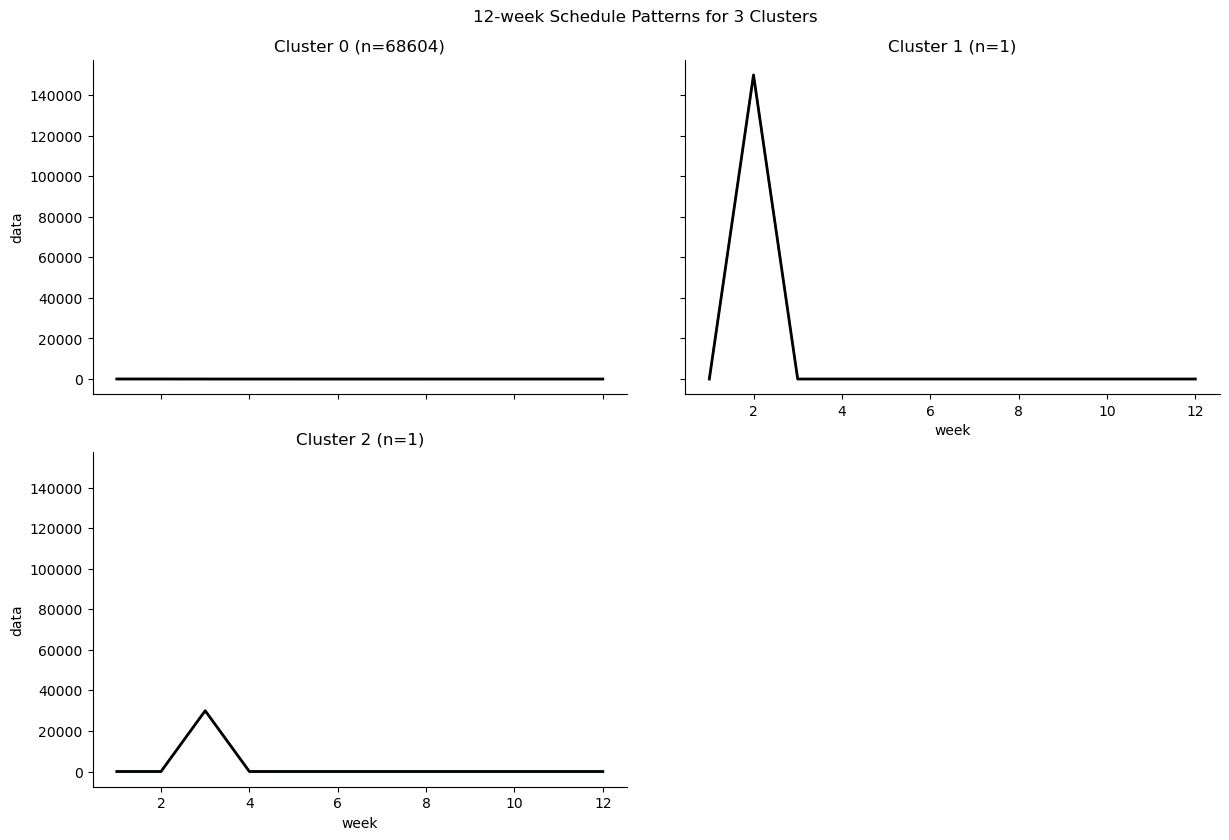

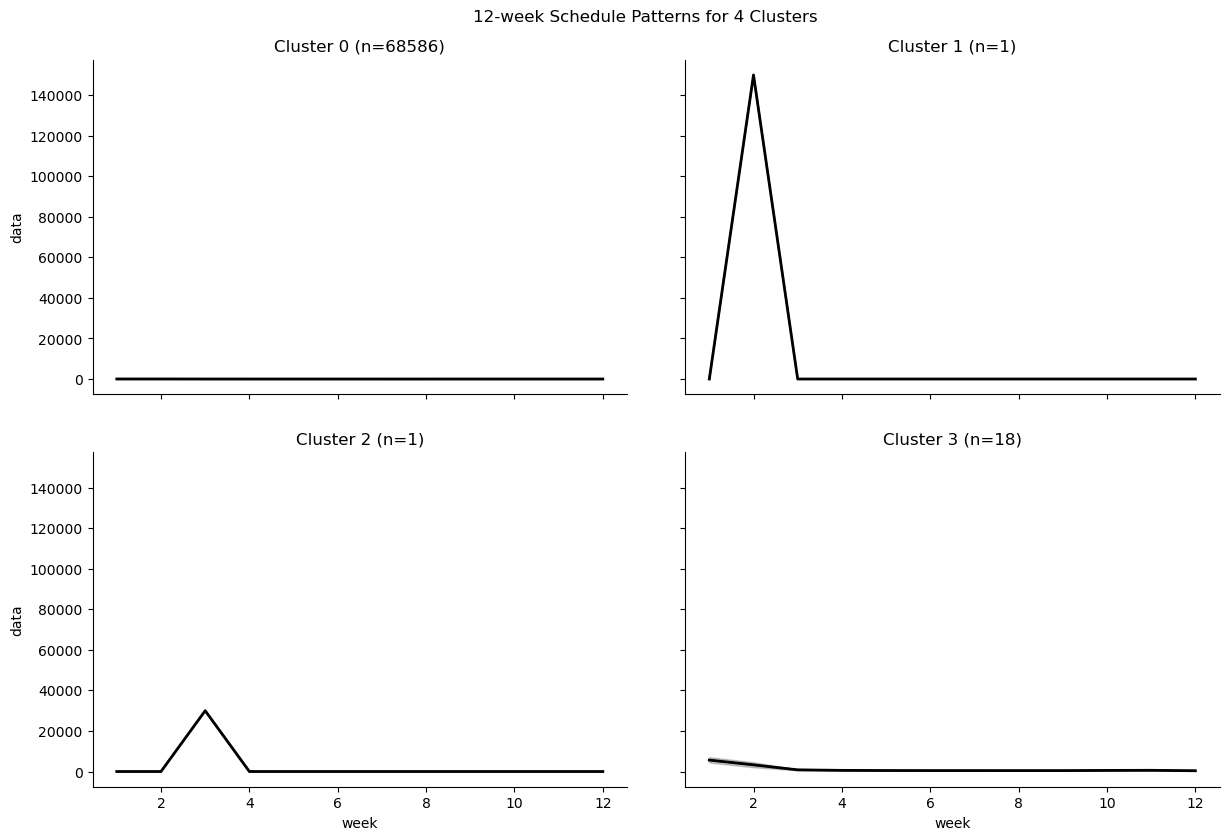

Wall time: 13 s


,wk01,wk02,wk03,wk04,wk05,wk06,wk07,wk08,wk09,wk10,wk11,wk12,cluster
0,0.0,0.0,0.0,0.000000,3.291667,4.28,4.500000,5.333333,6.84,10.769231,0.0000,4.586207,0
1,0.0,0.0,0.0,0.000000,8.458333,12.44,13.083333,13.291667,13.24,32.769231,0.0000,11.448276,0
2,0.0,0.0,0.0,0.000000,0.000000,0.08,0.000000,0.166667,-0.04,-0.038462,0.0000,-0.034483,0
3,0.0,0.0,0.0,0.947368,2.500000,2.36,2.458333,-0.041667,2.36,-0.038462,0.0000,4.103448,0
4,0.0,0.0,0.0,0.000000,0.000000,-0.04,0.000000,-0.041667,-0.04,-0.038462,0.0000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68601,0.0,0.0,0.0,0.000000,0.000000,-0.04,-0.041667,-0.041667,-0.04,-0.038462,0.0000,-0.034483,0
68602,0.0,0.0,0.0,0.263158,0.000000,-0.04,0.166667,-0.041667,0.16,-0.038462,0.3125,0.310345,0
68603,0.0,0.0,0.0,0.000000,0.000000,-0.04,-0.041667,-0.041667,-0.04,0.000000,0.1250,-0.034483,0
68604,0.0,0.0,0.0,0.000000,4.125000,6.96,6.708333,7.333333,6.40,8.269231,16.7500,6.793103,0


In [72]:
%%time
cluster_and_plot(schedule_trimmed_rscaled, n_clusters=2, random_state=seed)
cluster_and_plot(schedule_trimmed_rscaled, n_clusters=3, random_state=seed)
cluster_and_plot(schedule_trimmed_rscaled, n_clusters=4, random_state=seed)

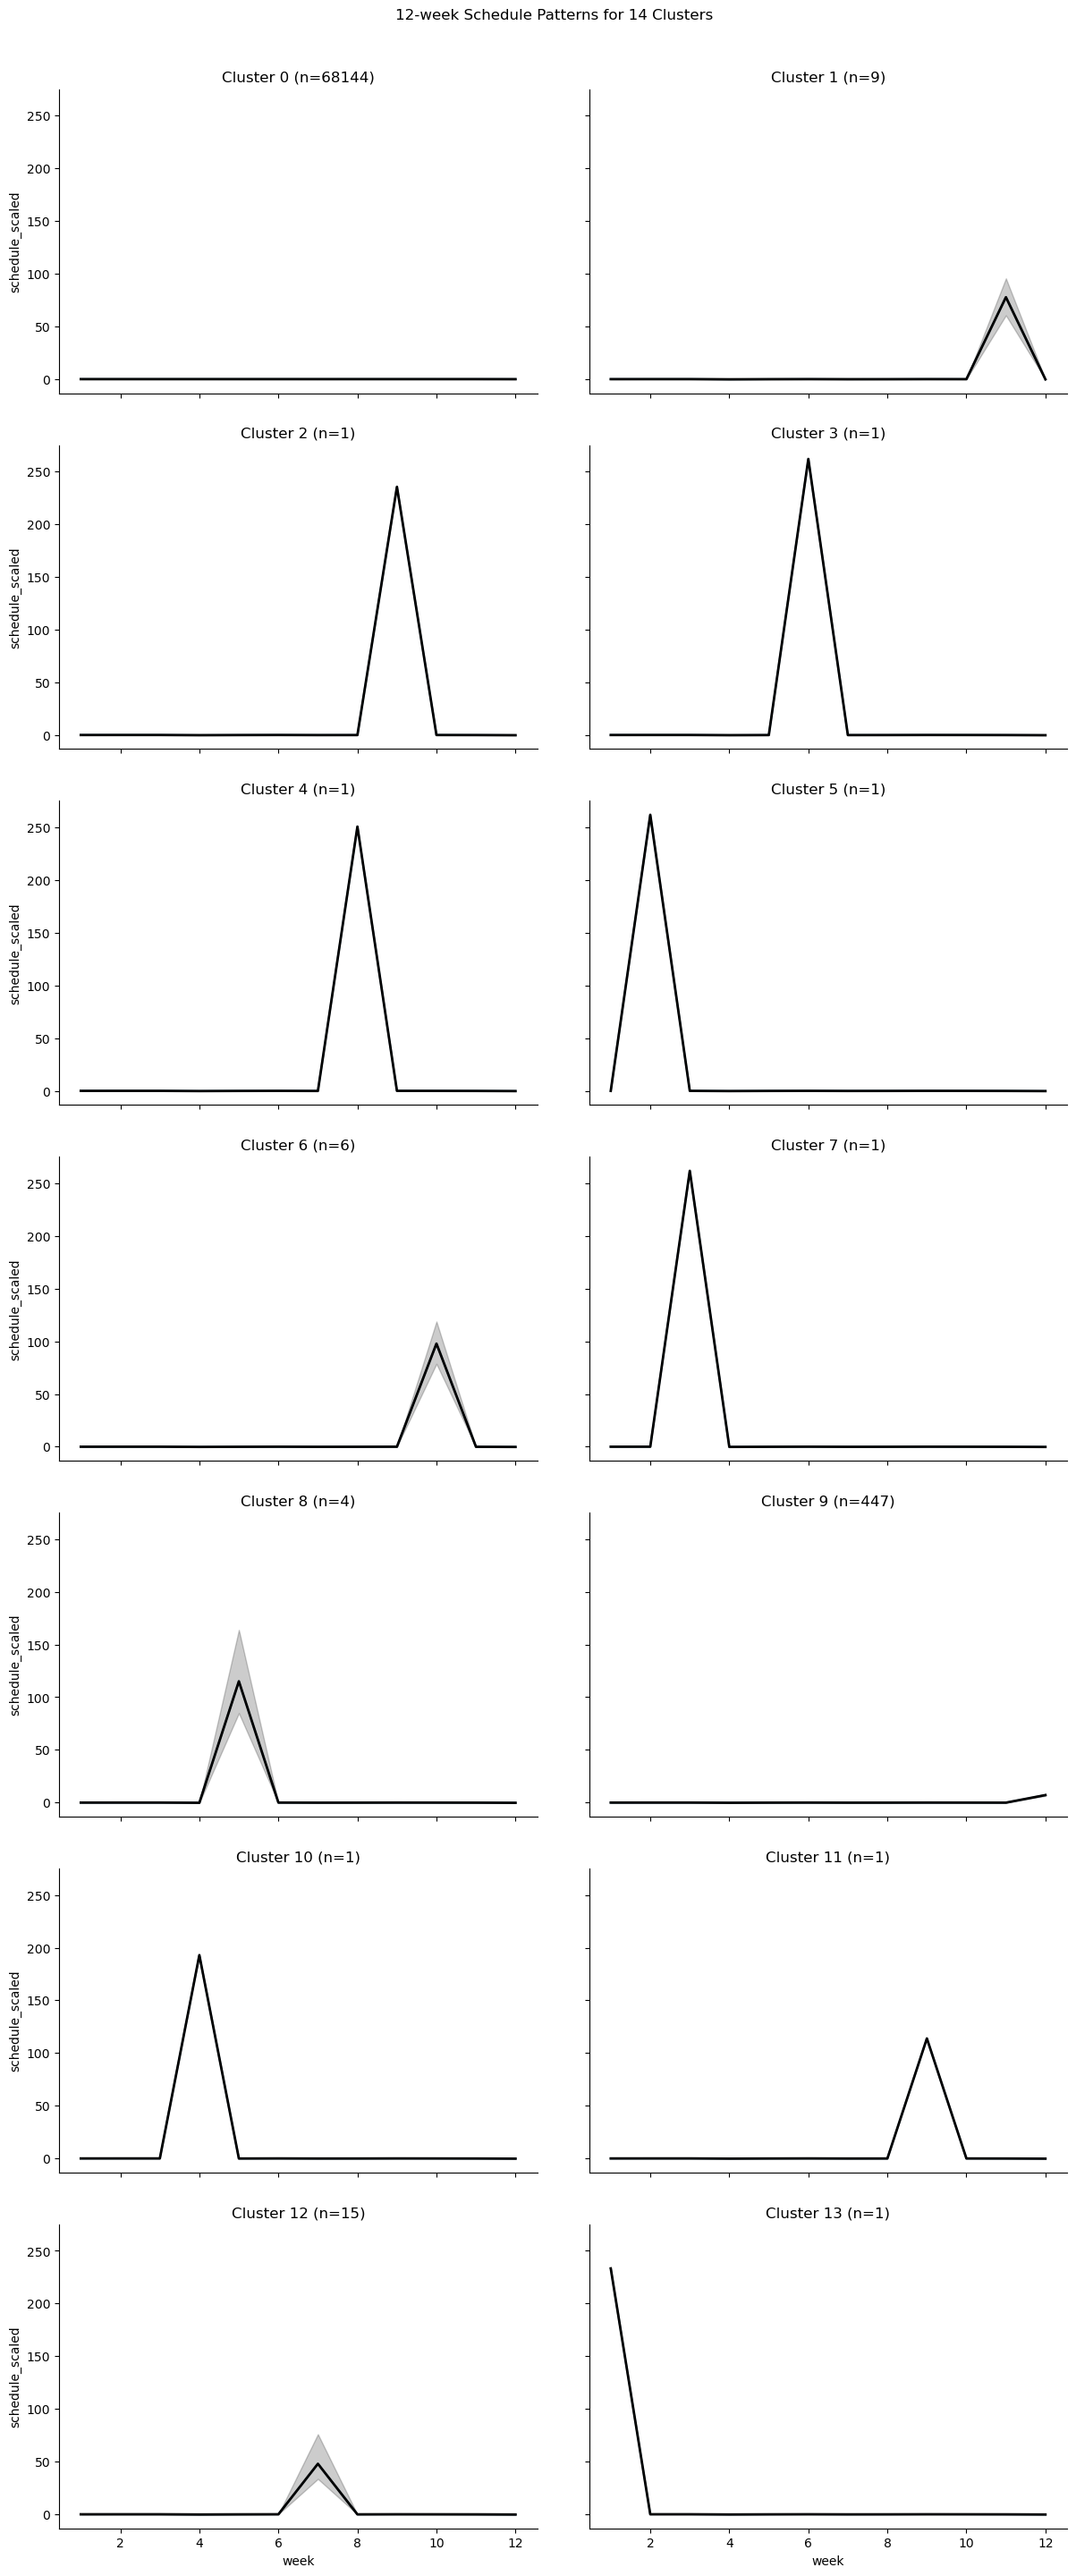

Wall time: 5.93 s


In [34]:
%%time
cluster_and_plot(schedule_scaled, n_clusters=14, random_state=seed)

These seem like a rather large schedule of items working their way through the system.  Unfortunately, this value doesn't allow us to see other underlying clusters.